<a href="https://colab.research.google.com/github/leehyell/AIStudy24/blob/master/k_%EC%B5%9C%EA%B7%BC%EC%A0%91_%ED%95%9C%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###k-최근접 알고리즘의 한계
* 전에 농어 무게를 예측하는 k-최근접 알고리즘을 사용하여 회귀 모델을 사용해본 결과, 정확한 예측이 어려울 수 있다는 결론을 내림.
    * 원본 데이터의 갯수 부족
<br/><br/>
* 길이가 50cm인 농어가 들어왔을 때의 회귀 결과???
    * → 한계가 생김

In [1]:
#리눅스 명령어로 코랩의 가상머신에 나눔폰트를 설치, 적용하는 명령어.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import numpy as np
#numpy를 이용하여 배열 생성
#농어의 샘플자료 56개
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
#사이킷런을 이용한 훈련 세트와 테스트 세트를 나눔
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
#2차원 배열로 만들어주기(reshape)
train_input = train_input.reshape(-1,1)
#-1: 전체 요소, 1은 두 번째 크기를 1로(특성)
test_input = test_input.reshape(-1,1)

In [4]:
from sklearn.neighbors import KNeighborsRegressor
#사이킷런의 기본값은 5인데, 이를 3으로 변경
knr = KNeighborsRegressor(n_neighbors=3)
#훈련용 정보들로 훈련
knr.fit(train_input,train_target)
#50cm인 농어의 무게를 예측
print(knr.predict([[50]]))

[1033.33333333]


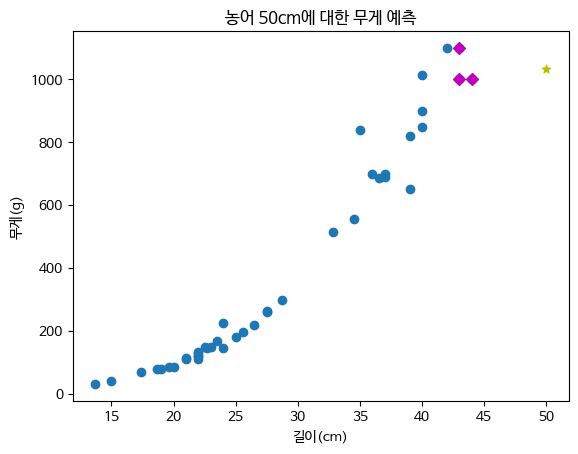

In [6]:
import matplotlib.pyplot as plt
#한글처리
plt.rc('font', family='NanumBarunGothic')

#길이가 50cm인 농어의 이웃에 대한 '떨어져있는 길이', 'index' 값을 구한다.
distances, indexes = knr.kneighbors([[50]])
#훈련용 input, target에 대한 산점도.
plt.scatter(train_input,train_target)
#훈련 세트 중 이웃 샘플만 다시 그림.
plt.scatter(train_input[indexes],train_target[indexes],marker='D',color='m')
#50cm 농어 데이터
plt.title('농어 50cm에 대한 무게 예측')
#길이가 50cm, 무게가 1.03kg인 농어만 다시 그림.
plt.scatter(50,1033,marker='*',color='y')
#가로 라벨: 길이.
plt.xlabel('길이(cm)')
#세로 라벨: 무게.
plt.ylabel('무게(g)')
plt.show()

In [8]:
#45cm 근방으로 평균값이 나옴.
print(np.mean(train_target[indexes]))

1033.3333333333333


In [10]:
#100cm 길이의 농어로 무게를 예측한 결과.
print(knr.predict([[100]]))

[1033.33333333]


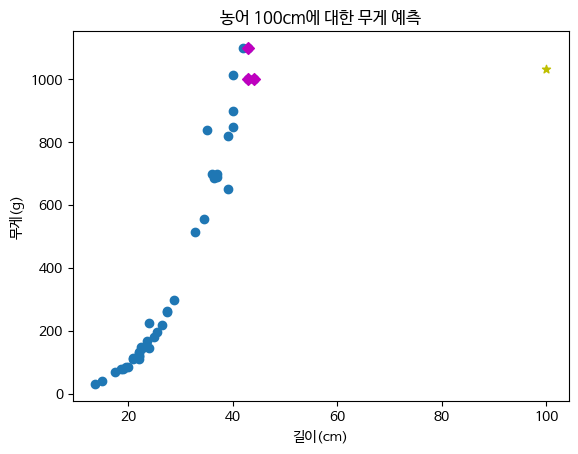

In [19]:
#길이가 100cm인 농어의 이웃에 대한 '떨어져있는 길이', 'index' 값을 구한다.
distances, indexes = knr.kneighbors([[100]])
#훈련용 input, target에 대한 산점도.
plt.scatter(train_input,train_target)
#훈련 세트 중 이웃 샘플만 다시 그림.
plt.scatter(train_input[indexes],train_target[indexes],marker='D',color='m')
#100cm 농어 데이터
plt.title('농어 100cm에 대한 무게 예측')
#길이가 100cm, 무게가 1.03kg인 농어만 다시 그림.
plt.scatter(100,1033,marker='*',color='y')
#가로 라벨: 길이.
plt.xlabel('길이(cm)')
#세로 라벨: 무게.
plt.ylabel('무게(g)')
plt.show()

###k-최근접 알고리즘의 한계
* **기본 데이터 부족**으로 인한 한계 발생.
    * k-최근접 알고리즘은 최대한 붙어 있는 이웃에 대한 정보를 바탕으로 분류, 예측하므로 정보가 많이 없으면 결과값이 이상해질 수 있음.
* → k-최근접 이웃 알고리즘의 대안
    * 선형회귀

###선형회귀(linear)
* 비교적 간단하며 성능이 뛰어남.
* '선형'이라는 말에서 짐작할 수 있듯이, **직선을 학습하는 알고리즘**.
    * 빨간 선이 **가로**로 되어 있으면 농어의 무게를 1로 인식.
    * 빨간 선이 **위에서 시작해 아래로** 떨어지면 반대로 예측.
    * 빨간 선이 **아래서 시작해 위로** 올라가면 정상적인 차트로 구현.

----- 싸이킷런에서 제공하는 클래스를 사용해보자.

In [25]:
#선형회귀용 import.
from sklearn.linear_model import LinearRegression
#선형회귀용 객체 생성.
lr = LinearRegression()
#선형회귀용으로 훈련 시작.
lr.fit(train_input, train_target)

LinearRegression()

In [26]:
#50cm 농어 무게를 선형회귀로 예측.
print(lr.predict([[50]]))
#무게 기울기 + 절편(가중치)
#y = a * x + b
#y(무게) = a(기울기) * x(길이) + b(절편)

[1241.83860323]


In [44]:
#lr.coef_: 계수.
#lr.intercept_: 인터셉트.
print(lr.coef_, lr.intercept_)
#기울기를 종종 계수(coefficent), 가중치(weight)라고도 부른다.

[39.01714496] -709.0186449535477


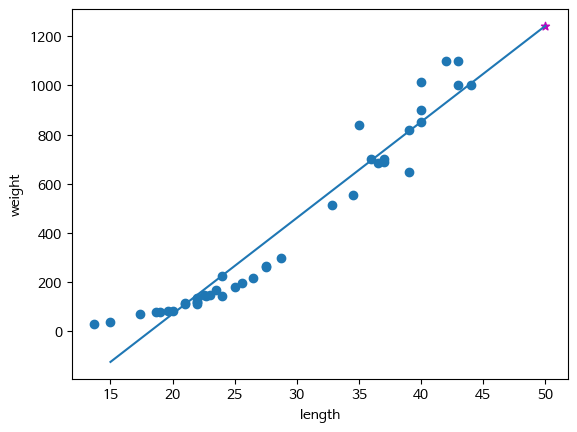

In [45]:
#그래프로 확인.
plt.scatter(train_input,train_target)
#15에서 50까지 1차 방정식 그래프를 그린다.
plt.plot([15,50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
#50cm 농어에 대한 데이터를 그린다.
plt.scatter(50,1241.8,marker='*',color='m')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

###결론
* 예측은 가능하나 직선만 가능하므로 값이 너무 직선적이다.

In [38]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))
#훈련세트가 테스트세트에 비해 높지만 차이가 많이 나서 과소적합.(점수차가 5% 이상 차이나면 안 됨.)

0.939846333997604
0.8247503123313558


###다항회귀(Polynomial Regression)
* 변수가 2개.
* 다항회귀는 2차원 방정식 그래프로 그리려면 길이를 제곱한 항이 훈련세트에 추가 되어야 함.
    * 무게 = a * 길이^2 + b * 길이 + c

→ 선형회귀의 문제점은 왼쪽 하단에 있는 기준점이 불일치가 된다. 이를 곡선으로 만들어야 함.

In [42]:
#다항회귀
#제곱한 것과 두 배열을 나란히 붙인다.
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [43]:
print(train_poly)

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]
 [ 400.     20.  ]
 [ 484.     22.  ]
 [ 576.     24.  ]
 [ 756.25   27.5 ]
 [1849.     43.  ]
 [1600.     40.  ]
 [ 576.     24.  ]
 [ 441.     21.  ]
 [ 756.25   27.5 ]
 [1600.     40.  ]
 [1075.84   32.8 ]
 [ 702.25   26.5 ]
 [1332.25   36.5 ]
 [ 187.69   13.7 ]
 [ 515.29   22.7 ]
 [ 225.     15.  ]
 [1369.     37.  ]
 [1225.     35.  ]
 [ 823.69   28.7 ]
 [ 552.25   23.5 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [ 529.     23.  ]
 [ 484.     22.  ]
 [1936.     44.  ]
 [ 506.25   22.5 ]
 [ 361.     19.  ]
 [1369.     37.  ]
 [ 484.     22.  ]
 [ 655.36   25.6 ]
 [1764.     42.  ]
 [1190.25   34.5 ]]


In [46]:
#선형회귀 객체 생성.
lr = LinearRegression()
#선형회귀 훈련
lr.fit(train_poly,train_target)
#결과 테스트(제곱 값과 원래 값을 넣어줌)
print(lr.predict([[50**2,50]]))

[1573.98423528]


In [49]:
print(lr.coef_,lr.intercept_)
#무게 = 기울기 * 길이 + 절편
#1573.98 = 1.01 * 50**2 - 21.55 * 50 + 116.05

[  1.01433211 -21.55792498] 116.0502107827827


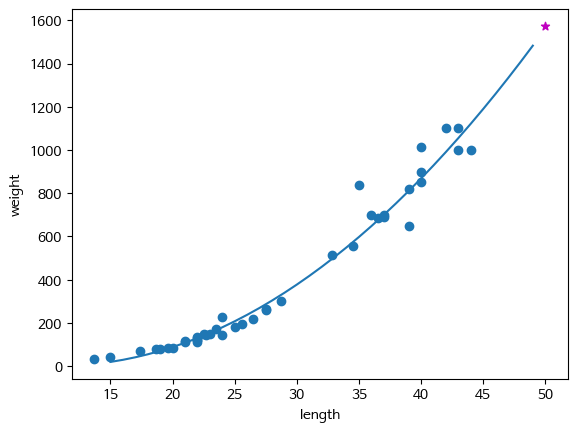

In [51]:
#구간별 직선을 그리기 위해 15~49 정수 배열을 만듦.
point = np.arange(15,50)
#훈련 세트의 산점도를 그림.
plt.scatter(train_input, train_target)
#15~49까지 2차 방정식 그래프를 그림.
plt.plot(point, 1.01 * point**2 - 21.6 * point + 116.05)
#50cm 농어 데이터.
plt.scatter([50],[1574],marker='*',color='m')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [54]:
print(f'훈 련 용 : {lr.score(train_poly, train_target)}%')
print(f'테스트용 : {lr.score(test_poly, test_target)}%')
#선형회귀와 다항회귀를 통해 문제를 해결하려고 했다.
#하지만 모델에 과소적합이 남아있다.(테스트용이 훈련용보다 점수가 높음.)
#이를 해결하기 위해 더 복잡한 모델을 만들어야 할 것 같다.
#복잡한 모델을 만들다가 너무 복잡해지면, 모델의 복잡도를 억제하는 방법도 알아봐야 할 것 같다.

훈 련 용 : 0.9706807451768623%
테스트용 : 0.9775935108325122%
